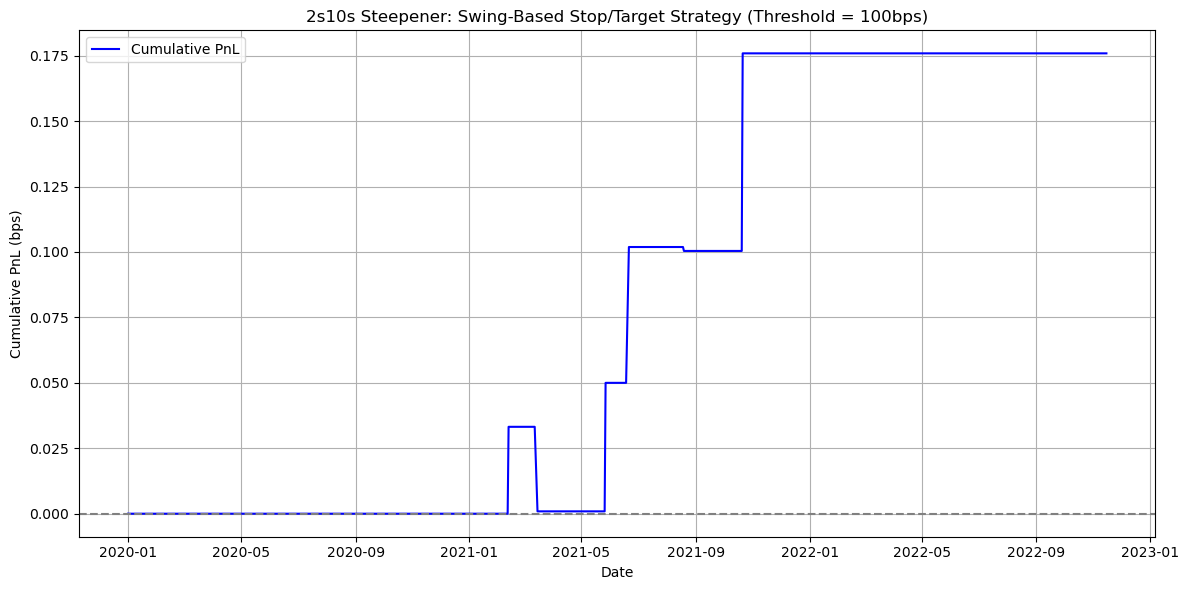

NameError: name 'entry_dates' is not defined

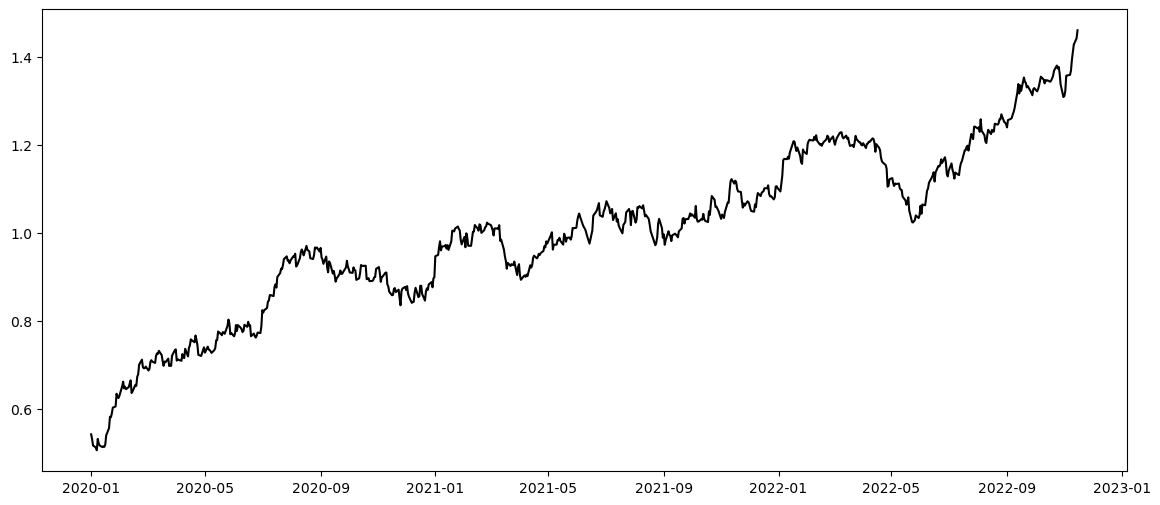

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load yield data
df = pd.read_csv("2s10s_data.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)
df['spread'] = df['10Y'] - df['2Y']

# Parameters
threshold = 1.00  # 100 bps trigger
lookback = 20     # lookback for swing high/low

# Calculate swing levels
df['swing_low'] = df['spread'].rolling(lookback).min()
df['swing_high'] = df['spread'].rolling(lookback).max()

# Entry signal when spread drops below threshold
df['entry'] = ((df['spread'] < threshold) & 
               (df['spread'].shift(1) >= threshold)).astype(int)

# Backtest logic
position = 0
entry_price = 0
stop_loss = 0
target = 0
pnl = []

for i in range(len(df)):
    row = df.iloc[i]
    
    if position == 0 and row['entry'] == 1 and not np.isnan(row['swing_low']) and not np.isnan(row['swing_high']):
        position = 1
        entry_price = row['spread']
        stop_loss = row['swing_low']
        target = row['swing_high']
        pnl.append(0)  # No PnL on entry day
    elif position == 1:
        current = row['spread']
        if current <= stop_loss:
            pnl.append(current - entry_price)  # Stop hit
            position = 0
        elif current >= target:
            pnl.append(current - entry_price)  # Target hit
            position = 0
        else:
            pnl.append(0)  # Still in trade
    else:
        pnl.append(0)  # No trade

df['pnl'] = pnl
df['cum_pnl'] = df['pnl'].cumsum()

# Plot result
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cum_pnl'], label='Cumulative PnL', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('2s10s Steepener: Swing-Based Stop/Target Strategy (Threshold = 100bps)')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL (bps)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ... all your plotting code ...

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['spread'], label='2s10s Spread', color='black')
plt.scatter(entry_dates, entry_spreads, color='green', marker='^', label='Entry', zorder=5)
plt.scatter(exit_dates, exit_spreads, color='red', marker='v', label='Exit', zorder=5)
plt.axhline(threshold, color='blue', linestyle='--', label='Entry Threshold (100bps)')
plt.title("2s10s Yield Curve Spread with Entry/Exit Points")
plt.xlabel("Date")
plt.ylabel("Spread (10Y - 2Y) in %")
plt.legend()
plt.grid(True)
plt.tight_layout()

# ðŸ”¥ Show the plot instead of saving
plt.show()

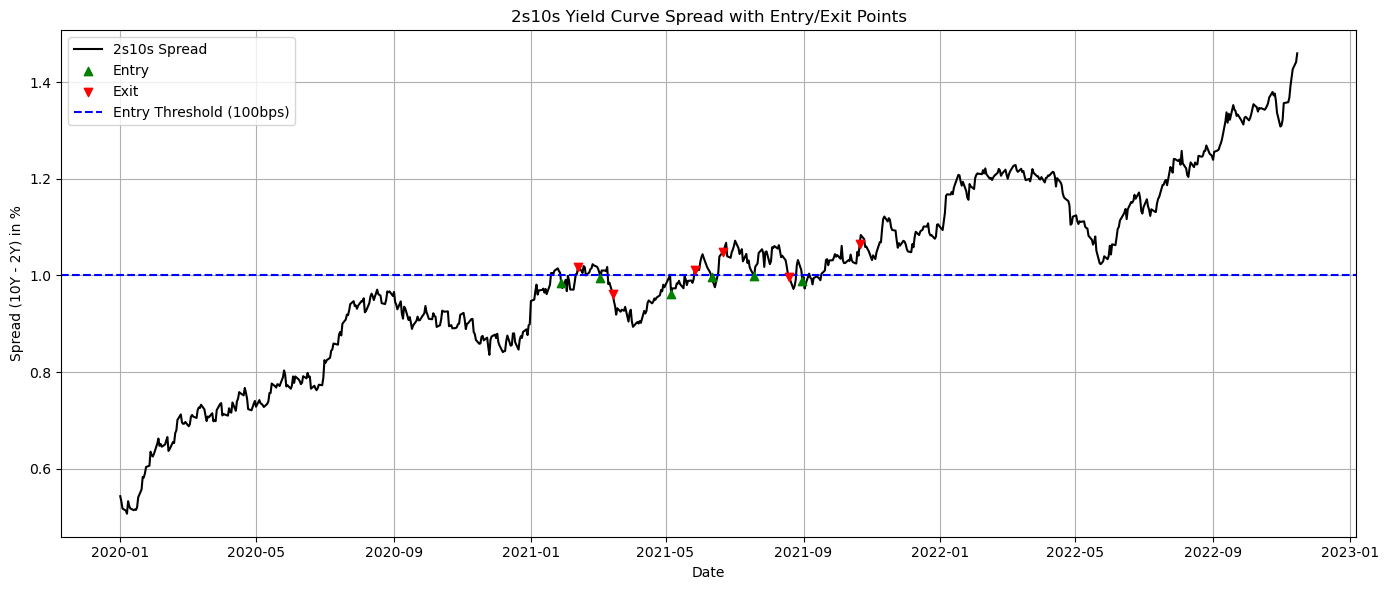

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV data
df = pd.read_csv("2s10s_data.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)
df['spread'] = df['10Y'] - df['2Y']

# Parameters
threshold = 1.00
lookback = 20

# Calculate swing levels
df['swing_low'] = df['spread'].rolling(lookback).min()
df['swing_high'] = df['spread'].rolling(lookback).max()
df['entry'] = ((df['spread'] < threshold) & (df['spread'].shift(1) >= threshold)).astype(int)

# Initialize trade tracking lists
entry_dates = []
exit_dates = []
entry_spreads = []
exit_spreads = []

# Backtest logic
position = 0
entry_price = 0
stop_loss = 0
target = 0

for i in range(len(df)):
    row = df.iloc[i]
    date = df.index[i]

    if position == 0 and row['entry'] == 1 and not np.isnan(row['swing_low']) and not np.isnan(row['swing_high']):
        position = 1
        entry_price = row['spread']
        stop_loss = row['swing_low']
        target = row['swing_high']
        entry_dates.append(date)
        entry_spreads.append(entry_price)
    elif position == 1:
        current = row['spread']
        if current <= stop_loss or current >= target:
            position = 0
            exit_dates.append(date)
            exit_spreads.append(current)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['spread'], label='2s10s Spread', color='black')
plt.scatter(entry_dates, entry_spreads, color='green', marker='^', label='Entry', zorder=5)
plt.scatter(exit_dates, exit_spreads, color='red', marker='v', label='Exit', zorder=5)
plt.axhline(threshold, color='blue', linestyle='--', label='Entry Threshold (100bps)')
plt.title("2s10s Yield Curve Spread with Entry/Exit Points")
plt.xlabel("Date")
plt.ylabel("Spread (10Y - 2Y) in %")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show chart
plt.show()

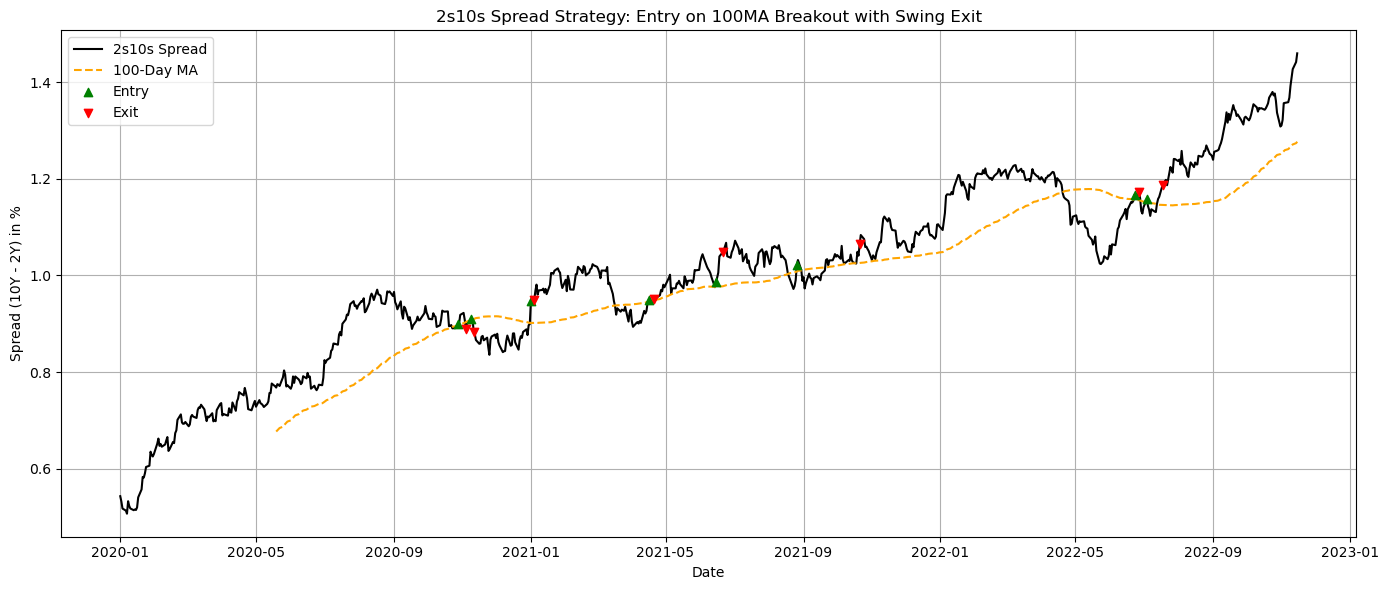

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("2s10s_data.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Calculate the spread and 100-period moving average
df['spread'] = df['10Y'] - df['2Y']
df['ma100'] = df['spread'].rolling(100).mean()

# Calculate swing low/high
lookback = 20
df['swing_low'] = df['spread'].rolling(lookback).min()
df['swing_high'] = df['spread'].rolling(lookback).max()

# Entry signal: spread crosses above 100-period MA
df['entry'] = ((df['spread'] > df['ma100']) & (df['spread'].shift(1) <= df['ma100'].shift(1))).astype(int)

# Initialize tracking
entry_dates = []
exit_dates = []
entry_spreads = []
exit_spreads = []

position = 0
entry_price = 0
stop_loss = 0
target = 0

# Strategy loop
for i in range(len(df)):
    row = df.iloc[i]
    date = df.index[i]

    if position == 0 and row['entry'] == 1 and not np.isnan(row['swing_low']) and not np.isnan(row['swing_high']):
        position = 1
        entry_price = row['spread']
        stop_loss = row['swing_low']
        target = row['swing_high']
        entry_dates.append(date)
        entry_spreads.append(entry_price)
    elif position == 1:
        current = row['spread']
        if current <= stop_loss or current >= target:
            position = 0
            exit_dates.append(date)
            exit_spreads.append(current)

# Plot it
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['spread'], label='2s10s Spread', color='black')
plt.plot(df.index, df['ma100'], label='100-Day MA', color='orange', linestyle='--')
plt.scatter(entry_dates, entry_spreads, color='green', marker='^', label='Entry', zorder=5)
plt.scatter(exit_dates, exit_spreads, color='red', marker='v', label='Exit', zorder=5)
plt.title("2s10s Spread Strategy: Entry on 100MA Breakout with Swing Exit")
plt.xlabel("Date")
plt.ylabel("Spread (10Y - 2Y) in %")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

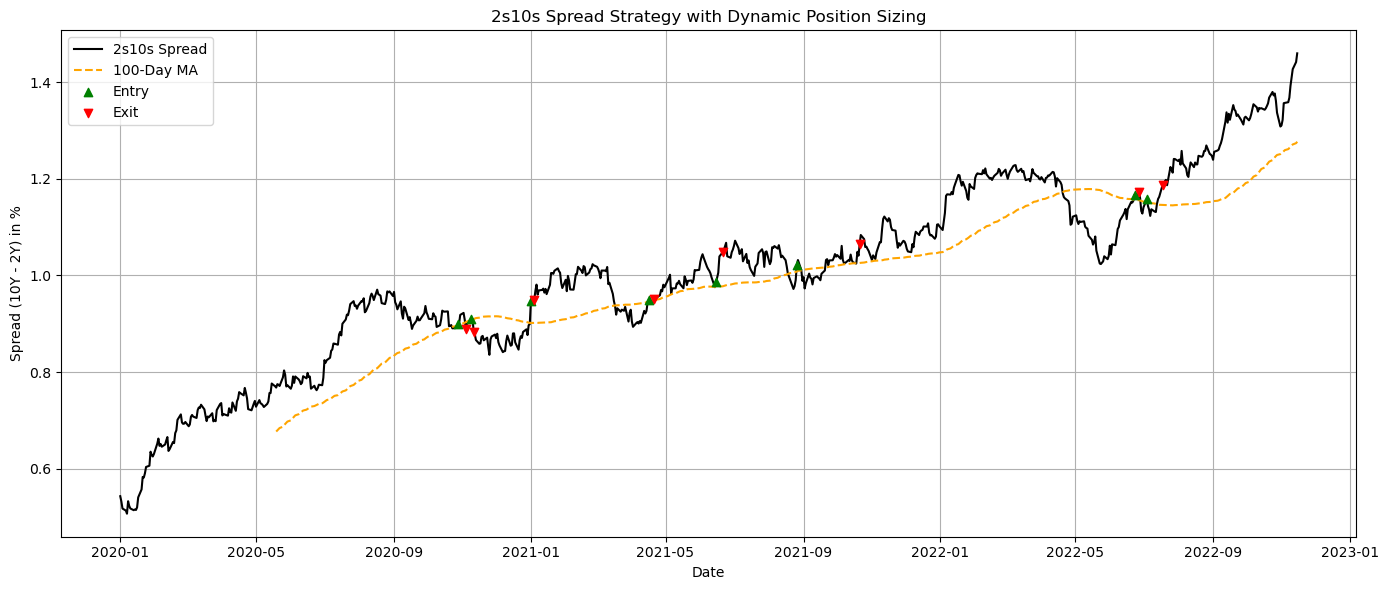

Total Trades: 8
Win Rate: 75.00%
Total PnL: $49,524.26
Avg PnL per Trade: $6,190.53


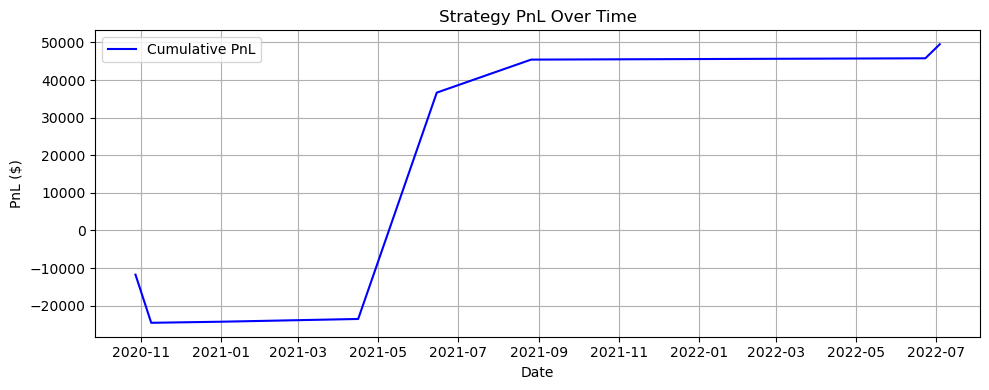

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("2s10s_data.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Calculate the spread and indicators
df['spread'] = df['10Y'] - df['2Y']
df['ma100'] = df['spread'].rolling(100).mean()
lookback = 20
df['swing_low'] = df['spread'].rolling(lookback).min()
df['swing_high'] = df['spread'].rolling(lookback).max()
df['entry'] = ((df['spread'] > df['ma100']) & (df['spread'].shift(1) <= df['ma100'].shift(1))).astype(int)

# Account settings
capital = 1_000_000
risk_per_trade = 0.01

# Tracking variables
entry_dates, exit_dates = [], []
entry_spreads, exit_spreads = [], []
position_sizes, pnl_list = [], []

# Strategy loop
position = 0
for i in range(len(df)):
    row = df.iloc[i]
    date = df.index[i]

    if position == 0 and row['entry'] == 1 and not np.isnan(row['swing_low']) and not np.isnan(row['swing_high']):
        entry_price = row['spread']
        stop_loss = row['swing_low']
        target = row['swing_high']
        stop_distance = abs(entry_price - stop_loss)

        if stop_distance == 0:
            continue  # Avoid zero risk

        size = round((capital * risk_per_trade) / stop_distance, 2)
        position = 1

        entry_dates.append(date)
        entry_spreads.append(entry_price)
        position_sizes.append(size)

    elif position == 1:
        current = row['spread']
        if current <= stop_loss or current >= target:
            exit_dates.append(date)
            exit_spreads.append(current)
            trade_pnl = size * (current - entry_price)
            pnl_list.append(trade_pnl)
            position = 0

# Plot spread and trades
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['spread'], label='2s10s Spread', color='black')
plt.plot(df.index, df['ma100'], label='100-Day MA', color='orange', linestyle='--')
plt.scatter(entry_dates, entry_spreads, color='green', marker='^', label='Entry', zorder=5)
plt.scatter(exit_dates, exit_spreads, color='red', marker='v', label='Exit', zorder=5)
plt.title("2s10s Spread Strategy with Dynamic Position Sizing")
plt.xlabel("Date")
plt.ylabel("Spread (10Y - 2Y) in %")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PnL metrics
total_pnl = sum(pnl_list)
win_rate = sum(1 for x in pnl_list if x > 0) / len(pnl_list) * 100 if pnl_list else 0
print(f"Total Trades: {len(pnl_list)}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Total PnL: ${total_pnl:,.2f}")
print(f"Avg PnL per Trade: ${np.mean(pnl_list):,.2f}")

# Cumulative PnL curve
cum_pnl = np.cumsum(pnl_list)
plt.figure(figsize=(10, 4))
plt.plot(entry_dates[:len(cum_pnl)], cum_pnl, label="Cumulative PnL", color='blue')
plt.title("Strategy PnL Over Time")
plt.xlabel("Date")
plt.ylabel("PnL ($)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

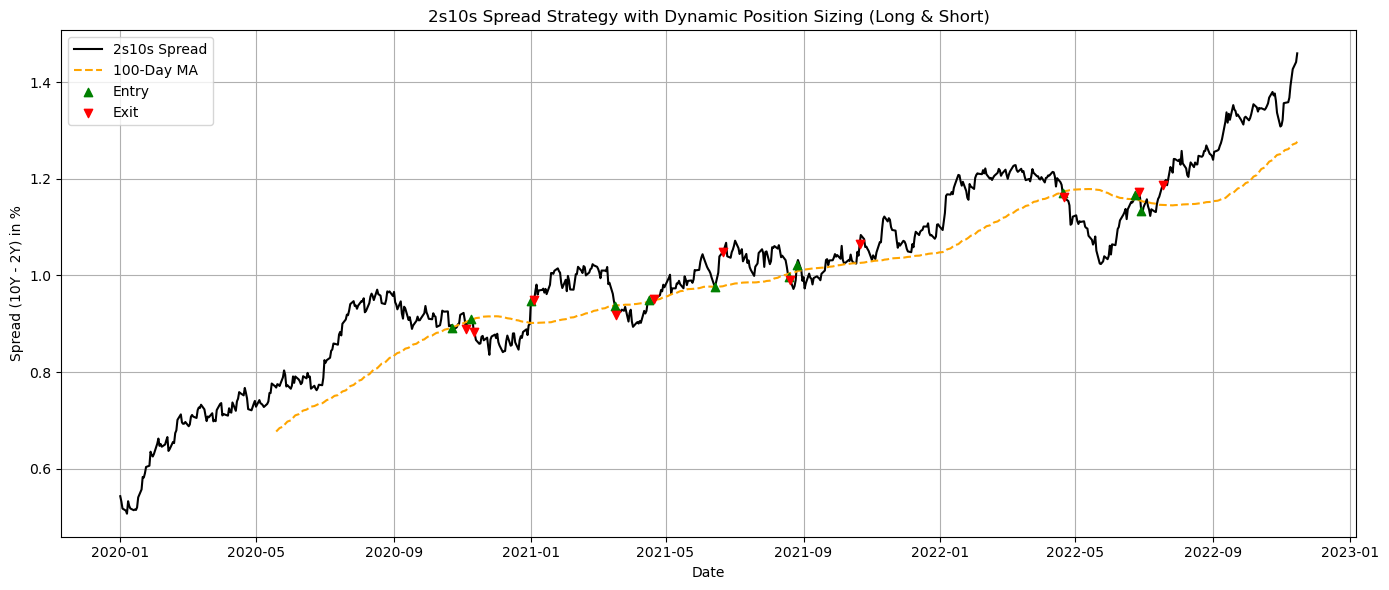

Total Trades: 11
Win Rate: 72.73%
Total PnL: $-22,237.25
Avg PnL per Trade: $-2,021.57


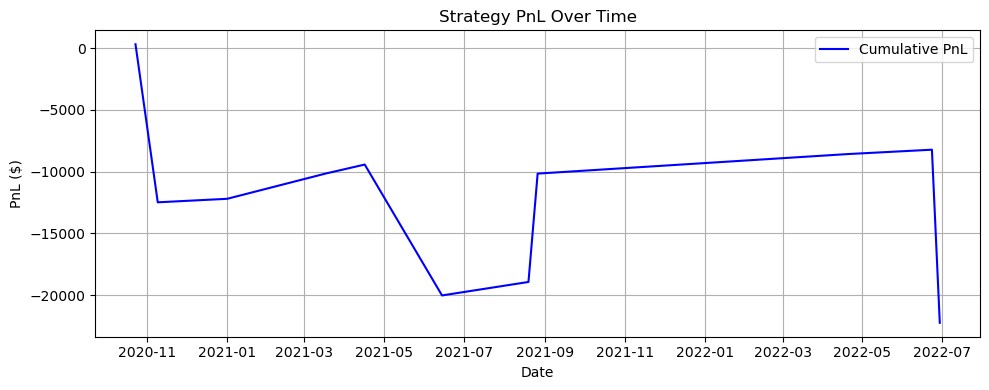

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("2s10s_data.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Calculate the spread and indicators
df['spread'] = df['10Y'] - df['2Y']
df['ma100'] = df['spread'].rolling(100).mean()
lookback = 20
df['swing_low'] = df['spread'].rolling(lookback).min()
df['swing_high'] = df['spread'].rolling(lookback).max()

# Entry signals: spread crosses above and below 100-period MA
df['long_entry'] = ((df['spread'] > df['ma100']) & (df['spread'].shift(1) <= df['ma100'].shift(1))).astype(int)
df['short_entry'] = ((df['spread'] < df['ma100']) & (df['spread'].shift(1) >= df['ma100'].shift(1))).astype(int)

# Account settings
capital = 1_000_000
risk_per_trade = 0.01

# Tracking variables
entry_dates, exit_dates = [], []
entry_spreads, exit_spreads = [], []
position_sizes, pnl_list = [], []

# Strategy loop
position = 0  # 1 for long, -1 for short
for i in range(len(df)):
    row = df.iloc[i]
    date = df.index[i]

    if position == 0:  # No active position
        # Long entry signal
        if row['long_entry'] == 1 and not np.isnan(row['swing_low']) and not np.isnan(row['swing_high']):
            entry_price = row['spread']
            stop_loss = row['swing_low']
            target = row['swing_high']
            stop_distance = abs(entry_price - stop_loss)

            if stop_distance == 0:
                continue  # Avoid zero risk

            size = round((capital * risk_per_trade) / stop_distance, 2)
            position = 1  # Long position

            entry_dates.append(date)
            entry_spreads.append(entry_price)
            position_sizes.append(size)

        # Short entry signal
        elif row['short_entry'] == 1 and not np.isnan(row['swing_low']) and not np.isnan(row['swing_high']):
            entry_price = row['spread']
            stop_loss = row['swing_high']  # Stop loss is above for short
            target = row['swing_low']  # Target is below for short
            stop_distance = abs(entry_price - stop_loss)

            if stop_distance == 0:
                continue  # Avoid zero risk

            size = round((capital * risk_per_trade) / stop_distance, 2)
            position = -1  # Short position

            entry_dates.append(date)
            entry_spreads.append(entry_price)
            position_sizes.append(size)

    elif position == 1:  # Long position
        current = row['spread']
        if current <= stop_loss or current >= target:  # Exit conditions for long
            exit_dates.append(date)
            exit_spreads.append(current)
            trade_pnl = size * (current - entry_price)
            pnl_list.append(trade_pnl)
            position = 0  # Exit long

    elif position == -1:  # Short position
        current = row['spread']
        if current >= stop_loss or current <= target:  # Exit conditions for short
            exit_dates.append(date)
            exit_spreads.append(current)
            trade_pnl = size * (entry_price - current)  # Short PnL
            pnl_list.append(trade_pnl)
            position = 0  # Exit short

# Plot spread and trades
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['spread'], label='2s10s Spread', color='black')
plt.plot(df.index, df['ma100'], label='100-Day MA', color='orange', linestyle='--')
plt.scatter(entry_dates, entry_spreads, color='green', marker='^', label='Entry', zorder=5)
plt.scatter(exit_dates, exit_spreads, color='red', marker='v', label='Exit', zorder=5)
plt.title("2s10s Spread Strategy with Dynamic Position Sizing (Long & Short)")
plt.xlabel("Date")
plt.ylabel("Spread (10Y - 2Y) in %")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PnL metrics
total_pnl = sum(pnl_list)
win_rate = sum(1 for x in pnl_list if x > 0) / len(pnl_list) * 100 if pnl_list else 0
print(f"Total Trades: {len(pnl_list)}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Total PnL: ${total_pnl:,.2f}")
print(f"Avg PnL per Trade: ${np.mean(pnl_list):,.2f}")

# Cumulative PnL curve
cum_pnl = np.cumsum(pnl_list)
plt.figure(figsize=(10, 4))
plt.plot(entry_dates[:len(cum_pnl)], cum_pnl, label="Cumulative PnL", color='blue')
plt.title("Strategy PnL Over Time")
plt.xlabel("Date")
plt.ylabel("PnL ($)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()